# Prediciting Loan Repayment

The dataset for this project is retrieved from kaggle,the home of Data Science.

the major aim of this project is to predict whether the customers will have their loan paid or not . Therefore , this is a supervised classification problem to be trained.

# 1- Importing Libraries

In [45]:
# in this case we import all the lib. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# in this we import all the machine learning lib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
#import plotly.express as px

# 2-Getting Data 

In [2]:
df =pd.read_csv("C:/jupyter notebook/datasets_loan_Repayment.csv")

In [3]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [4]:
df.shape

(614, 13)

# 2-1- Renaming columns

In [5]:
df.columns=df.columns.str.lower()

In [6]:
df.columns=['loan_id', 'gender', 'married', 'dependents', 'education','self_employed', 'applicant_income', 'co-applicant_income', 'loan_amount', 'loan_amount_term', 'credit_history', 'property_area','loan_status' ]

# 2-2-checking null values

In [7]:
df.isnull().sum()
# in this case isnull() function is used to just asked the col.is contain null and all sum()functin is add all the null contain set in col.

loan_id                 0
gender                 13
married                 3
dependents             15
education               0
self_employed          32
applicant_income        0
co-applicant_income     0
loan_amount            22
loan_amount_term       14
credit_history         50
property_area           0
loan_status             0
dtype: int64

we take care of missing values in "loan_amount" and "credit_history". For other null values, we either delete a particular row if it has a null value for a particular feature and a particular column if it has more than 70-75% of missing values. This method is advised only when there are enough samples in the data set.



In [8]:
df["loan_amount"]=df["loan_amount"].fillna(df["loan_amount"].mean())

# in this case the null set can be fill by taking an avg. value 

In [9]:
df["credit_history"]=df["credit_history"].fillna(df["credit_history"].median())

# in this case the contain of null set is large amount which not fullfiled by the mean method so at that time we use the mode method[max. occurance no.].

In [10]:
df.dropna(axis=0,inplace=True)

# at last null value which is not replace by [mean(),mode()] ,it generally replace by the drope the row

In [11]:
# now check the null contain
df.isnull().sum()

loan_id                0
gender                 0
married                0
dependents             0
education              0
self_employed          0
applicant_income       0
co-applicant_income    0
loan_amount            0
loan_amount_term       0
credit_history         0
property_area          0
loan_status            0
dtype: int64

In [12]:
# in this case all the null set are remove and we can easily do work on the dataset
df.head()

loan_id gender married dependents     education self_employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   applicant_income  co-applicant_income  loan_amount  loan_amount_term  \
0              5849                  0.0   146.412162             360.0   
1              4583               1508.0   128.000000             360.0   
2              3000                  0.0    66.000000             360.0   
3              2583               2358.0   120.000000             360.0   
4              6000                  0.0   141.000000             360.0   

   credit_history property_area loan_status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [13]:
df.shape

(542, 13)

In [14]:
df.info()             # info() function give all the info.related to the columns.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 0 to 613
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_id              542 non-null    object 
 1   gender               542 non-null    object 
 2   married              542 non-null    object 
 3   dependents           542 non-null    object 
 4   education            542 non-null    object 
 5   self_employed        542 non-null    object 
 6   applicant_income     542 non-null    int64  
 7   co-applicant_income  542 non-null    float64
 8   loan_amount          542 non-null    float64
 9   loan_amount_term     542 non-null    float64
 10  credit_history       542 non-null    float64
 11  property_area        542 non-null    object 
 12  loan_status          542 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 59.3+ KB


In [15]:
df.describe()  

applicant_income  co-applicant_income  loan_amount  loan_amount_term  \
count        542.000000           542.000000   542.000000        542.000000   
mean        5291.911439          1590.699114   145.518139        341.955720   
std         5506.461371          2543.801628    81.749385         65.441582   
min          150.000000             0.000000     9.000000         12.000000   
25%         2843.750000             0.000000   100.000000        360.000000   
50%         3848.000000          1149.000000   129.500000        360.000000   
75%         5820.500000          2281.000000   167.750000        360.000000   
max        81000.000000         33837.000000   650.000000        480.000000   

       credit_history  
count      542.000000  
mean         0.863469  
std          0.343669  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

# 2-3-Label Encoder for Dependents

In [16]:
type(df["dependents"].iloc[0])

str

In [17]:
df["dependents"].unique()              # unique()

array(['0', '1', '2', '3+'], dtype=object)

In [18]:
# we use the "label encoder" to replace the "categorical value- numerical value"

In [19]:
model=LabelEncoder()

In [20]:
model.fit(df["dependents"])

LabelEncoder()

In [21]:
df["dependents"]=model.transform(df["dependents"])

# 3-Exploratory Data Analysis

# 3-1- Visualization

In [22]:
# in this case we visualize the data in graphical format 

In [23]:
df[df["loan_status"]=="Y"].count()["loan_status"]

376

In [24]:
df[df["loan_status"]=="N"].count()["loan_status"]

166

Text(0.5, 1.0, 'Distribution of Loan staus')

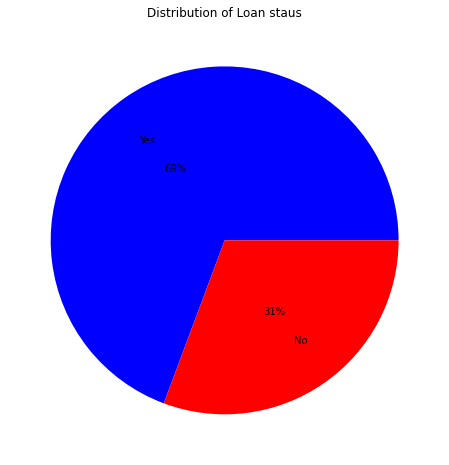

In [25]:
# now ploting function is start
plt.figure(figsize=(8,8))
plt.pie(x=[375,166],labels=["Yes","No"],autopct='%1.0f%%',pctdistance=0.5,labeldistance=0.7,colors=['b','r'])
plt.title("Distribution of Loan staus")

([], [])

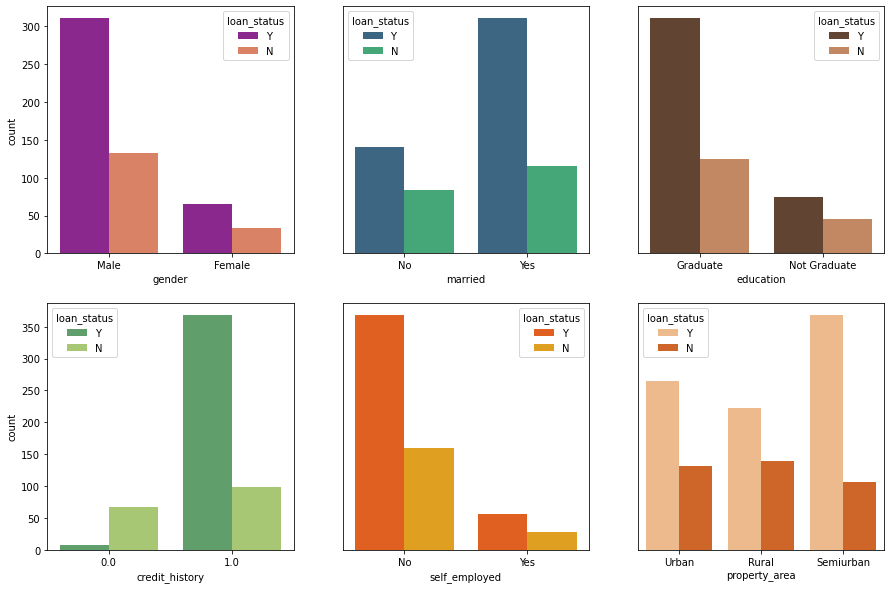

In [33]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.countplot(x="gender",hue="loan_status",data=df,palette="plasma")
# absent of plt.ylabel and yticks is used to introduce the count 

plt.subplot(2,3,2)
sns.countplot(x="married",hue="loan_status",data=df,palette="viridis")
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,3)
sns.countplot(x="education",hue="loan_status",data=df,palette="copper")
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,4)
sns.countplot(x="credit_history",data=df,hue="loan_status",palette="summer")


plt.subplot(2,3,5)
sns.countplot(x="self_employed",hue="loan_status",data=df,palette="autumn")
plt.ylabel('')
plt.yticks([ ])

plt.subplot(2,3,6)
sns.countplot(x="property_area",data=df,hue="loan_status",palette="Oranges")
plt.ylabel(' ')
plt.yticks([ ])


Comparison between Genders in getting the Loan shows that a Male Individual has more chance of repaying the Loan.

Comparison between Married Status in getting the Loan shows that a Married Individual has more chance of repaying the Loan.

Comparison between Education Status of an Individual in getting the Loan shows that a Graduate Individual has more chance of repaying the Loan.

Comparison between Self-Employed or Not in getting the Loan shows that Not Self-Employed has more chance of repaying the Loan.

Comparison between Credit History for getting the Loan shows that an individual with a credit history has more chance of repaying the Loan.

Comparison between Property Area for getting the Loan shows that People living in Semi-Urban Area have more chance to repay the Loan

([], [])

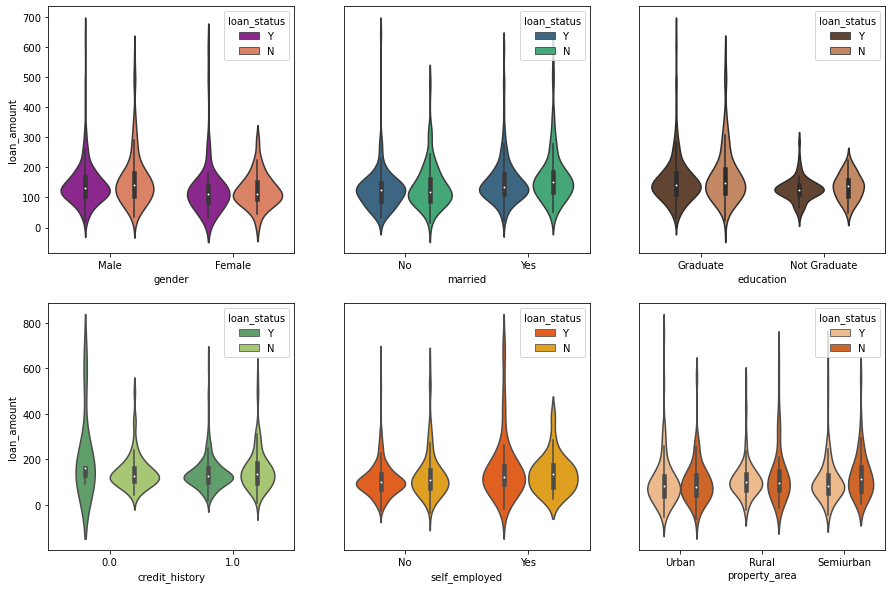

In [38]:
plt.figure(figsize=(15,10))



plt.subplot(2,3,1)
sns.violinplot(x='gender', y='loan_amount',hue='loan_status', data=df,palette='plasma')

plt.subplot(2,3,2)
sns.violinplot(x='married',y='loan_amount',hue='loan_status',data=df,palette='viridis')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,3)
sns.violinplot(x='education',y='loan_amount',hue='loan_status',data=df,palette='copper')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,4)
sns.violinplot(x='credit_history',y='loan_amount', data=df,hue='loan_status',palette='summer')

plt.subplot(2,3,5)
sns.violinplot(x='self_employed',y='loan_amount',hue='loan_status',data=df,palette='autumn')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,6)
sns.violinplot(x='property_area', y='loan_amount',data=df,hue='loan_status',palette='Oranges')
plt.ylabel(' ')
plt.yticks([ ])


C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='loan_amount', ylabel='Density'>

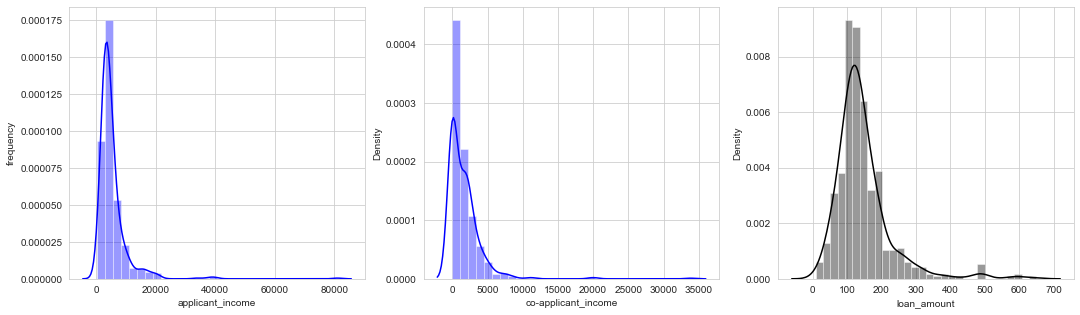

In [132]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.distplot(df["applicant_income"],bins=30,color="blue",hist_kws=dict(edgecolor="white"))
plt.ylabel("frequency")

plt.subplot(1,3,2)
sns.distplot(df['co-applicant_income'],bins=30,color='blue',hist_kws=dict(edgecolor='white'))

plt.subplot(1,3,3)
sns.distplot(df['loan_amount'],bins=30,color='black',hist_kws=dict(edgecolor='white'))


# 3-2-1-gender

In [73]:
model1=LabelEncoder()

In [74]:
model1.fit(df["gender"])

LabelEncoder()

In [75]:
df["gender"]= model1.transform(df["gender"])

# 3-2-2- married

In [76]:
model2=LabelEncoder()

In [77]:
model2.fit(df["married"])

LabelEncoder()

In [78]:
df["married"]=model2.transform(df["married"])

# 3-2-3-eduction

In [79]:
model3=LabelEncoder()

In [80]:
model3.fit(df["education"])

LabelEncoder()

In [81]:
df["education"]=model3.transform(df["education"])

# 3-2-4- self_employed

In [82]:
model4=LabelEncoder()

In [83]:
model4.fit(df["self_employed"])

LabelEncoder()

In [84]:
df["self_employed"]=model4.transform(df["self_employed"])

# 3-2-5- property_area

In [85]:
model5=LabelEncoder()
model5.fit(df["property_area"])

LabelEncoder()

In [86]:
df["property_area"]=model5.transform(df["property_area"])

# 3-2-6- loan_status

In [87]:
model6=LabelEncoder()

In [88]:
model6.fit(df["loan_status"])

LabelEncoder()

In [89]:
df["loan_status"]=model6.transform(df["loan_status"])

In [90]:
df.head(10)

loan_id  gender  married  dependents  education  self_employed  \
0  LP001002       1        0           0          0              0   
1  LP001003       1        1           1          0              0   
2  LP001005       1        1           0          0              1   
3  LP001006       1        1           0          1              0   
4  LP001008       1        0           0          0              0   
5  LP001011       1        1           2          0              1   
6  LP001013       1        1           0          1              0   
7  LP001014       1        1           3          0              0   
8  LP001018       1        1           2          0              0   
9  LP001020       1        1           1          0              0   

   applicant_income  co-applicant_income  loan_amount  loan_amount_term  \
0              5849                  0.0   146.412162             360.0   
1              4583               1508.0   128.000000             360.0   
2              3000                  0.0    66.000000             360.0   
3              2583               2358.0   120.000000             360.0   
4              6000                  0.0   141.000000             360.0   
5              5417               4196.0   267.000000             360.0   
6              2333               1516.0    95.000000             360.0   
7              3036               2504.0   158.000000             360.0   
8              4006               1526.0   168.000000             360.0   
9             12841              10968.0   349.000000             360.0   

   credit_history  property_area  loan_status  
0             1.0              2            1  
1             1.0              0            0  
2             1.0              2            1  
3             1.0              2            1  
4             1.0              2            1  
5             1.0              2            1  
6             1.0              2            1  
7             0.0              1            0  
8             1.0              2            1  
9             1.0              1            0

Text(0.5, 1.0, 'correlation Matrix for laon status')

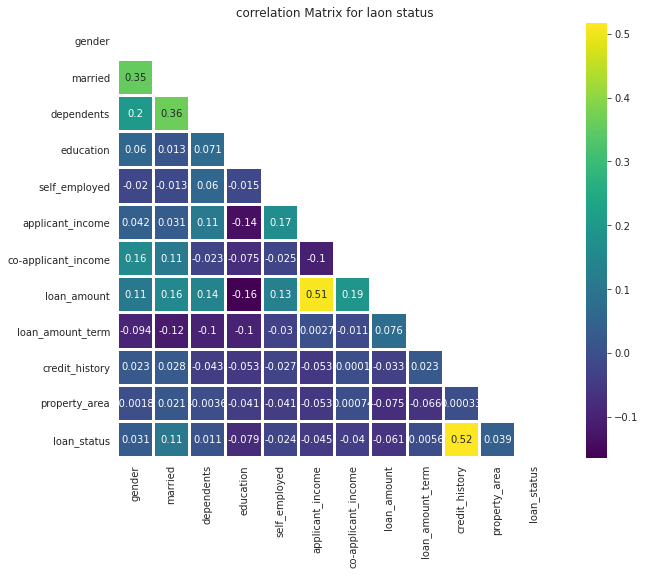

In [93]:
plt.figure(figsize=(12,8))

corr=df.corr()
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax=sns.heatmap(corr,mask=mask, square=True,annot=True,linewidths=2,cmap="viridis")
plt.title("correlation Matrix for laon status")

From the above figure, we can see that Credit_History (Independent Variable) has the maximum correlation with Loan_Status (Dependent Variable). Which denotes that the Loan_Status is heavily dependent on the Credit_History.



# Data science theorm

# 4-Prediction

# 4-1-Logistic_Regression

In [96]:
x=df.drop(['loan_id',"loan_status"],axis=1)
y=df["loan_status"]

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)


In [99]:
lr=LogisticRegression()

In [100]:
lr.fit(x_train,y_train)

LogisticRegression()

In [101]:
lr_prediction=lr.predict(x_test)

In [106]:
print(confusion_matrix(y_test,lr_prediction))
print("\n")
print(classification_report(y_test,lr_prediction))
print("\n")
print("logistic Regression accuracy: ",accuracy_score(y_test,lr_prediction))

[[10 21]
 [ 0 78]]


              precision    recall  f1-score   support

           0       1.00      0.32      0.49        31
           1       0.79      1.00      0.88        78

    accuracy                           0.81       109
   macro avg       0.89      0.66      0.68       109
weighted avg       0.85      0.81      0.77       109



logistic Regression accuracy:  0.8073394495412844


# 4-2- Decision Tree

In [107]:
dt=DecisionTreeClassifier()

In [108]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [109]:
dt_prediction=dt.predict(x_test)

In [110]:
print(confusion_matrix(y_test,dt_prediction))
print("\n")
print(classification_report(y_test,dt_prediction))
print("\n")
print("Decision Tree Accuracy: ", accuracy_score(y_test,dt_prediction))

[[12 19]
 [20 58]]


              precision    recall  f1-score   support

           0       0.38      0.39      0.38        31
           1       0.75      0.74      0.75        78

    accuracy                           0.64       109
   macro avg       0.56      0.57      0.56       109
weighted avg       0.65      0.64      0.64       109



Decision Tree Accuracy:  0.6422018348623854


# 4-3-Random Forest 

In [111]:
rf=RandomForestClassifier(n_estimators=200)

In [113]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [114]:
rf_prediction=rf.predict(x_test)

In [117]:
print(confusion_matrix(y_test,rf_prediction))
print("\n")
print(classification_report(y_test,rf_prediction))
print("\n")
print("Random Forest Accuracy: ", accuracy_score(y_test,rf_prediction))

[[13 18]
 [ 5 73]]


              precision    recall  f1-score   support

           0       0.72      0.42      0.53        31
           1       0.80      0.94      0.86        78

    accuracy                           0.79       109
   macro avg       0.76      0.68      0.70       109
weighted avg       0.78      0.79      0.77       109



Random Forest Accuracy:  0.7889908256880734


# 4-4- KNearest Neighbora

In [119]:
error_rate=[]
for n in range(1,40):
        knn=KNeighborsClassifier(n_neighbors=n)
        knn.fit(x_train, y_train)
        knn_prediction=knn.predict(x_test)
        error_rate.append(np.mean(knn_prediction!=y_test))
print(error_rate)




    

[0.3853211009174312, 0.48623853211009177, 0.4036697247706422, 0.44954128440366975, 0.43119266055045874, 0.45871559633027525, 0.3486238532110092, 0.3669724770642202, 0.3302752293577982, 0.3302752293577982, 0.3119266055045872, 0.3394495412844037, 0.29357798165137616, 0.30275229357798167, 0.29357798165137616, 0.3119266055045872, 0.3211009174311927, 0.29357798165137616, 0.27522935779816515, 0.27522935779816515, 0.27522935779816515, 0.27522935779816515, 0.26605504587155965, 0.26605504587155965, 0.27522935779816515, 0.27522935779816515, 0.28440366972477066, 0.27522935779816515, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066]


Text(0.5, 1.0, 'Elbow Method')

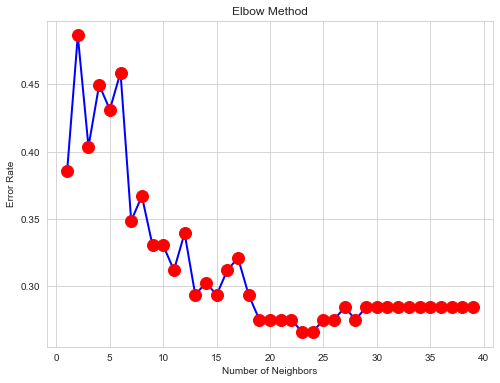

In [120]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
plt.plot(list(range(1,40)),error_rate,color='b', marker='o', linewidth=2, markersize=12, markerfacecolor='r', markeredgecolor='r')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error Rate')
plt.title('Elbow Method')


In [121]:
knn=KNeighborsClassifier(n_neighbors=23)


In [122]:
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=23)

In [123]:
knn_prediction=knn.predict(x_test)


In [124]:
print(confusion_matrix(y_test,knn_prediction))
print('\n')
print(classification_report(y_test,knn_prediction))
print('\n')
print('KNN accuracy Accuracy: ', accuracy_score(y_test,knn_prediction))


[[ 2 29]
 [ 0 78]]


              precision    recall  f1-score   support

           0       1.00      0.06      0.12        31
           1       0.73      1.00      0.84        78

    accuracy                           0.73       109
   macro avg       0.86      0.53      0.48       109
weighted avg       0.81      0.73      0.64       109



KNN accuracy Accuracy:  0.7339449541284404


# 4-5-SVC

In [125]:
svc=SVC()


In [127]:
svc.fit(x_train, y_train)

SVC()

In [129]:
svc_prediction=svc.predict(x_test)

In [130]:
print(confusion_matrix(y_test,svc_prediction))
print('\n')
print(classification_report(y_test,svc_prediction))
print('\n')
print('SVC َAccuracy: ', accuracy_score(y_test,svc_prediction))

[[ 0 31]
 [ 1 77]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.71      0.99      0.83        78

    accuracy                           0.71       109
   macro avg       0.36      0.49      0.41       109
weighted avg       0.51      0.71      0.59       109



SVC َAccuracy:  0.7064220183486238


In [131]:
print('Logistic Regression Accuracy: ', accuracy_score(y_test,lr_prediction))
print('Decision Tree Accuracy: ', accuracy_score(y_test,dt_prediction))
print('Random Forest Accuracy: ', accuracy_score(y_test,rf_prediction))
print('KNN Accuracy: ', accuracy_score(y_test,knn_prediction))
print('SVC Accuracy: ', accuracy_score(y_test,svc_prediction))

Logistic Regression Accuracy:  0.8073394495412844
Decision Tree Accuracy:  0.6422018348623854
Random Forest Accuracy:  0.7889908256880734
KNN Accuracy:  0.7339449541284404
SVC Accuracy:  0.7064220183486238


# Conclusion

The Loan Status is heavily dependent on the Credit History for Predictions.



The Logistic Regression algorithm gives us the maximum Accuracy (80%) compared to the other 4 Machine Learning Classification Algorithms.